In [1]:
import pandas as pd
import numpy as np
from faker import Faker

# Initialize the Faker object
fake = Faker()

# Function to generate random weather data
def generate_weather_data(num_records):
    data = []
    for _ in range(num_records):
        record = {
            "date": fake.date(),
            "day": fake.day_of_week(),
            "temperature": round(fake.random_number(digits=2, fix_len=True) * 1.1, 2),
            "humidity": round(fake.random_number(digits=2, fix_len=True) * 0.85, 2),
            "rain": fake.random_element(elements=('Yes', 'No')),
            "weathercondition": fake.random_element(elements=('Sunny', 'Cloudy', 'Rainy', 'Snowy')),
            "windspeed": round(fake.random_number(digits=2, fix_len=True) * 1.3, 2),
            "location": fake.city()
        }
        data.append(record)
    return data

# Generate 750 records
num_records = 750
weather_data = generate_weather_data(num_records)

# Convert to DataFrame
df = pd.DataFrame(weather_data)

# Introduce null values randomly in the DataFrame
def introduce_nulls(df, null_percent=0.1):
    total_values = df.size
    null_count = int(total_values * null_percent)
    
    for _ in range(null_count):
        ix = tuple([np.random.randint(0, i - 1) for i in df.shape])
        df.iat[ix] = np.nan

introduce_nulls(df, null_percent=0.1)

# Display the first few rows of the DataFrame
print(df.head())


         date        day  temperature  humidity rain weathercondition  \
0  2021-04-28     Friday         13.2     81.60   No            Rainy   
1  1986-07-12  Wednesday         89.1     22.10  Yes            Sunny   
2  1991-03-21   Thursday         69.3     47.60  Yes            Sunny   
3  1992-08-18  Wednesday         24.2     51.85   No            Snowy   
4  1991-09-09    Tuesday         64.9       NaN  Yes            Rainy   

   windspeed          location  
0        NaN  South Cindyhaven  
1       45.5       Pachecoport  
2       20.8           Keyport  
3       13.0    Carpentershire  
4       76.7          Markbury  


In [2]:
df.head(3)

,date,day,temperature,humidity,rain,weathercondition,windspeed,location
0,2021-04-28,Friday,13.2,81.6,No,Rainy,NaN,South Cindyhaven
1,1986-07-12,Wednesday,89.1,22.1,Yes,Sunny,45.5,Pachecoport
2,1991-03-21,Thursday,69.3,47.6,Yes,Sunny,20.8,Keyport


In [3]:
df.shape

(750, 8)

In [4]:
df.isna().sum()

date                70
day                 77
temperature         88
humidity            94
rain                69
weathercondition    71
windspeed           92
location             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              680 non-null    object 
 1   day               673 non-null    object 
 2   temperature       662 non-null    float64
 3   humidity          656 non-null    float64
 4   rain              681 non-null    object 
 5   weathercondition  679 non-null    object 
 6   windspeed         658 non-null    float64
 7   location          750 non-null    object 
dtypes: float64(3), object(5)
memory usage: 47.0+ KB


In [6]:
df.describe()

,temperature,humidity,windspeed
count,662.000000,656.000000,658.000000
mean,59.905136,46.226524,70.506231
std,28.422293,22.961633,35.149999
min,11.000000,8.500000,13.000000
25%,35.200000,25.500000,40.300000
50%,59.400000,45.900000,70.850000
75%,84.700000,66.512500,101.400000
max,108.900000,84.150000,128.700000


In [7]:
df.columns

Index(['date', 'day', 'temperature', 'humidity', 'rain', 'weathercondition',
       'windspeed', 'location'],
      dtype='object')

In [8]:
for column in df.columns:
    null_count = df[column].isna().sum()
    print(f"{column}: {null_count}")

date: 70
day: 77
temperature: 88
humidity: 94
rain: 69
weathercondition: 71
windspeed: 92
location: 0


In [9]:
df["date"].isna().sum()

70

In [10]:
print(df["date"].to_string())

0      2021-04-28
1      1986-07-12
2      1991-03-21
3      1992-08-18
4      1991-09-09
5      2006-12-09
6      1989-10-29
7      2005-01-17
8             NaN
9      1999-06-01
10     2014-03-16
11     1976-01-25
12            NaN
13     2000-09-19
14     1988-04-08
15     1980-03-29
16     1997-01-13
17            NaN
18     1970-11-26
19     1982-02-14
20     1989-12-29
21     1999-02-10
22            NaN
23     2010-06-23
24     1987-06-28
25     2003-02-20
26     1984-09-16
27     1996-11-20
28     1979-04-18
29            NaN
30     2013-09-27
31     2013-11-10
32     1987-11-17
33     1981-12-09
34            NaN
35     1981-07-21
36     2022-04-27
37     1988-07-06
38     1985-12-27
39     1978-12-05
40     2002-04-29
41     1972-10-07
42     2008-10-04
43     1994-09-25
44     1980-07-01
45     1990-02-26
46     2007-06-05
47     2013-09-03
48     1975-09-02
49     2000-07-20
50            NaN
51     2023-08-21
52     2007-03-26
53     2018-05-19
54     1997-09-16
55     200

In [11]:
for column in df.columns:
    null_count = df[column].isna().sum()
    print(f"{column}: {null_count}")

date: 70
day: 77
temperature: 88
humidity: 94
rain: 69
weathercondition: 71
windspeed: 92
location: 0


In [18]:
print(df["day"].to_string())

0         Friday
1      Wednesday
2       Thursday
3      Wednesday
4        Tuesday
5            NaN
6         Friday
7         Sunday
8       Saturday
9       Saturday
10      Saturday
11        Sunday
12        Sunday
13        Friday
14           NaN
15      Thursday
16       Tuesday
17        Friday
18        Sunday
19        Friday
20      Thursday
21       Tuesday
22        Sunday
23      Thursday
24        Monday
25           NaN
26        Sunday
27           NaN
28           NaN
29     Wednesday
30      Thursday
31     Wednesday
32        Friday
33     Wednesday
34       Tuesday
35       Tuesday
36        Monday
37       Tuesday
38        Friday
39        Sunday
40     Wednesday
41      Thursday
42        Sunday
43      Thursday
44        Friday
45        Monday
46           NaN
47      Thursday
48     Wednesday
49       Tuesday
50       Tuesday
51      Saturday
52      Thursday
53           NaN
54       Tuesday
55           NaN
56     Wednesday
57      Saturday
58        Frid

In [20]:
df["day"].isna().sum()

77

In [23]:
print(df["day"].head(3))

0       Friday
1    Wednesday
2     Thursday
Name: day, dtype: object


In [27]:
modevalue=df["day"].mode()
print(modevalue)

0    Thursday
Name: day, dtype: object


In [31]:
df["day"]=df["day"].fillna("Thrusday")

In [32]:
print(df["day"].to_string())

0         Friday
1      Wednesday
2       Thursday
3      Wednesday
4        Tuesday
5       Thrusday
6         Friday
7         Sunday
8       Saturday
9       Saturday
10      Saturday
11        Sunday
12        Sunday
13        Friday
14      Thrusday
15      Thursday
16       Tuesday
17        Friday
18        Sunday
19        Friday
20      Thursday
21       Tuesday
22        Sunday
23      Thursday
24        Monday
25      Thrusday
26        Sunday
27      Thrusday
28      Thrusday
29     Wednesday
30      Thursday
31     Wednesday
32        Friday
33     Wednesday
34       Tuesday
35       Tuesday
36        Monday
37       Tuesday
38        Friday
39        Sunday
40     Wednesday
41      Thursday
42        Sunday
43      Thursday
44        Friday
45        Monday
46      Thrusday
47      Thursday
48     Wednesday
49       Tuesday
50       Tuesday
51      Saturday
52      Thursday
53      Thrusday
54       Tuesday
55      Thrusday
56     Wednesday
57      Saturday
58        Frid

In [34]:
df.isna().sum()

date                70
day                  0
temperature         88
humidity            94
rain                69
weathercondition    71
windspeed           92
location             0
dtype: int64

In [36]:
df["date"]=df["date"].fillna("1998-09-09")

In [38]:
df.isna().sum()

date                 0
day                  0
temperature         88
humidity            94
rain                69
weathercondition    71
windspeed           92
location             0
dtype: int64

In [39]:
mediantemp=df["temperature"].median()

In [42]:
print(mediantemp)

59.4


In [43]:
df["temperature"]=df["temperature"].fillna(mediantemp)

In [44]:
df.isna().sum()

date                 0
day                  0
temperature          0
humidity            94
rain                69
weathercondition    71
windspeed           92
location             0
dtype: int64

In [47]:
meanhumdity=df["humidity"].mean()
print(meanhumdity)

46.2265243902439


In [48]:
df["humidity"]=df["humidity"].fillna(meanhumdity)

In [49]:
df.isna().sum()

date                 0
day                  0
temperature          0
humidity             0
rain                69
weathercondition    71
windspeed           92
location             0
dtype: int64

In [52]:
moderain=df["rain"].mode()
print(moderain)

0    Yes
Name: rain, dtype: object


In [55]:
df["rain"]=df["rain"].fillna("Yes")

In [56]:
df.isna().sum()

date                 0
day                  0
temperature          0
humidity             0
rain                 0
weathercondition    71
windspeed           92
location             0
dtype: int64

In [57]:
modewc=df["weathercondition"].mode()
print(modewc)

0    Cloudy
Name: weathercondition, dtype: object


In [59]:
df["weathercondition"]=df["weathercondition"].fillna("Cloudy")

In [60]:
meanws=df["windspeed"].mean()
print(meanws)

70.50623100303952


In [61]:
df["windspeed"]=df["windspeed"].fillna(meanws)

In [62]:
df.isna().sum()

date                0
day                 0
temperature         0
humidity            0
rain                0
weathercondition    0
windspeed           0
location            0
dtype: int64

In [63]:
df.head(3)

,date,day,temperature,humidity,rain,weathercondition,windspeed,location
0,2021-04-28,Friday,13.2,81.6,No,Rainy,70.506231,South Cindyhaven
1,1986-07-12,Wednesday,89.1,22.1,Yes,Sunny,45.500000,Pachecoport
2,1991-03-21,Thursday,69.3,47.6,Yes,Sunny,20.800000,Keyport


In [64]:
df.tail(3)

,date,day,temperature,humidity,rain,weathercondition,windspeed,location
747,1997-01-07,Wednesday,82.5,56.95,Yes,Rainy,127.4,Lindseytown
748,1996-12-05,Wednesday,84.7,17.00,Yes,Snowy,74.1,Port Margaret
749,1999-08-19,Thursday,84.7,51.00,Yes,Cloudy,105.3,Saraview


In [67]:
df.describe()

,temperature,humidity,windspeed
count,750.000000,750.000000,750.000000
mean,59.845867,46.226524,70.506231
std,26.700967,21.472495,32.920551
min,11.000000,8.500000,13.000000
25%,38.500000,28.262500,42.900000
50%,59.400000,46.226524,70.506231
75%,81.400000,63.750000,96.200000
max,108.900000,84.150000,128.700000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              750 non-null    object 
 1   day               750 non-null    object 
 2   temperature       750 non-null    float64
 3   humidity          750 non-null    float64
 4   rain              750 non-null    object 
 5   weathercondition  750 non-null    object 
 6   windspeed         750 non-null    float64
 7   location          750 non-null    object 
dtypes: float64(3), object(5)
memory usage: 47.0+ KB


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='temperature', ylabel='Count'>

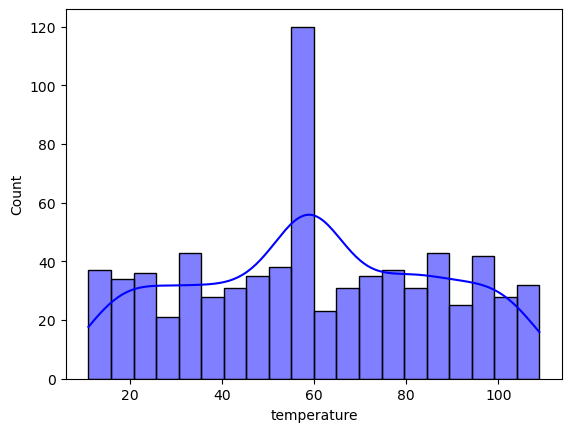

In [70]:
sns.histplot(df['temperature'], bins=20, kde=True, color='blue', edgecolor='black')

<Axes: xlabel='humidity', ylabel='Count'>

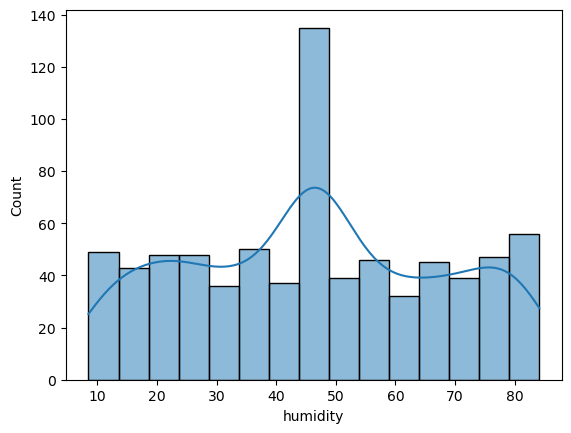

In [73]:
sns.histplot(df["humidity"],bins=15,kde=True)

Text(0, 0.5, 'Count')

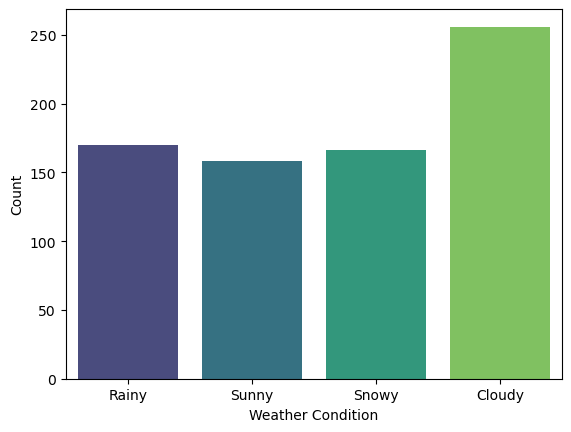

In [76]:
sns.countplot(x='weathercondition', data=df, palette='viridis')
plt.xlabel('Weather Condition')
plt.ylabel('Count')

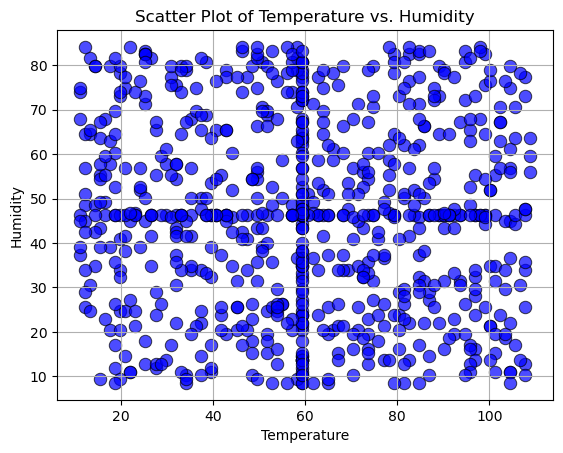

In [79]:
sns.scatterplot(x='temperature', y='humidity', data=df, alpha=0.7, s=80, color='blue', edgecolor='black')
plt.title('Scatter Plot of Temperature vs. Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.grid(True)
plt.show()

In [85]:
df=df.rename(columns=str.upper)
#print(df_lower)
print(df)

           DATE        DAY  TEMPERATURE   HUMIDITY RAIN WEATHERCONDITION  \
0    2021-04-28     Friday         13.2  81.600000   No            Rainy   
1    1986-07-12  Wednesday         89.1  22.100000  Yes            Sunny   
2    1991-03-21   Thursday         69.3  47.600000  Yes            Sunny   
3    1992-08-18  Wednesday         24.2  51.850000   No            Snowy   
4    1991-09-09    Tuesday         64.9  46.226524  Yes            Rainy   
..          ...        ...          ...        ...  ...              ...   
745  2013-08-13     Monday         46.2  46.226524  Yes            Snowy   
746  2003-10-04   Thrusday         15.4  39.100000  Yes            Snowy   
747  1997-01-07  Wednesday         82.5  56.950000  Yes            Rainy   
748  1996-12-05  Wednesday         84.7  17.000000  Yes            Snowy   
749  1999-08-19   Thursday         84.7  51.000000  Yes           Cloudy   

      WINDSPEED          LOCATION  
0     70.506231  South Cindyhaven  
1     45.500000

In [86]:
df=df.rename(columns=str.lower)
print(df)

           date        day  temperature   humidity rain weathercondition  \
0    2021-04-28     Friday         13.2  81.600000   No            Rainy   
1    1986-07-12  Wednesday         89.1  22.100000  Yes            Sunny   
2    1991-03-21   Thursday         69.3  47.600000  Yes            Sunny   
3    1992-08-18  Wednesday         24.2  51.850000   No            Snowy   
4    1991-09-09    Tuesday         64.9  46.226524  Yes            Rainy   
..          ...        ...          ...        ...  ...              ...   
745  2013-08-13     Monday         46.2  46.226524  Yes            Snowy   
746  2003-10-04   Thrusday         15.4  39.100000  Yes            Snowy   
747  1997-01-07  Wednesday         82.5  56.950000  Yes            Rainy   
748  1996-12-05  Wednesday         84.7  17.000000  Yes            Snowy   
749  1999-08-19   Thursday         84.7  51.000000  Yes           Cloudy   

      windspeed          location  
0     70.506231  South Cindyhaven  
1     45.500000

### Exploratory Data Analysis 

In [87]:
df.head()

,date,day,temperature,humidity,rain,weathercondition,windspeed,location
0,2021-04-28,Friday,13.2,81.600000,No,Rainy,70.506231,South Cindyhaven
1,1986-07-12,Wednesday,89.1,22.100000,Yes,Sunny,45.500000,Pachecoport
2,1991-03-21,Thursday,69.3,47.600000,Yes,Sunny,20.800000,Keyport
3,1992-08-18,Wednesday,24.2,51.850000,No,Snowy,13.000000,Carpentershire
4,1991-09-09,Tuesday,64.9,46.226524,Yes,Rainy,76.700000,Markbury


In [88]:
df.tail()

,date,day,temperature,humidity,rain,weathercondition,windspeed,location
745,2013-08-13,Monday,46.2,46.226524,Yes,Snowy,83.2,Webbfurt
746,2003-10-04,Thrusday,15.4,39.100000,Yes,Snowy,14.3,Rangelville
747,1997-01-07,Wednesday,82.5,56.950000,Yes,Rainy,127.4,Lindseytown
748,1996-12-05,Wednesday,84.7,17.000000,Yes,Snowy,74.1,Port Margaret
749,1999-08-19,Thursday,84.7,51.000000,Yes,Cloudy,105.3,Saraview


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              750 non-null    object 
 1   day               750 non-null    object 
 2   temperature       750 non-null    float64
 3   humidity          750 non-null    float64
 4   rain              750 non-null    object 
 5   weathercondition  750 non-null    object 
 6   windspeed         750 non-null    float64
 7   location          750 non-null    object 
dtypes: float64(3), object(5)
memory usage: 47.0+ KB


In [90]:
df.describe()

,temperature,humidity,windspeed
count,750.000000,750.000000,750.000000
mean,59.845867,46.226524,70.506231
std,26.700967,21.472495,32.920551
min,11.000000,8.500000,13.000000
25%,38.500000,28.262500,42.900000
50%,59.400000,46.226524,70.506231
75%,81.400000,63.750000,96.200000
max,108.900000,84.150000,128.700000


In [91]:
df.isna().sum()

date                0
day                 0
temperature         0
humidity            0
rain                0
weathercondition    0
windspeed           0
location            0
dtype: int64

<Axes: xlabel='temperature', ylabel='Count'>

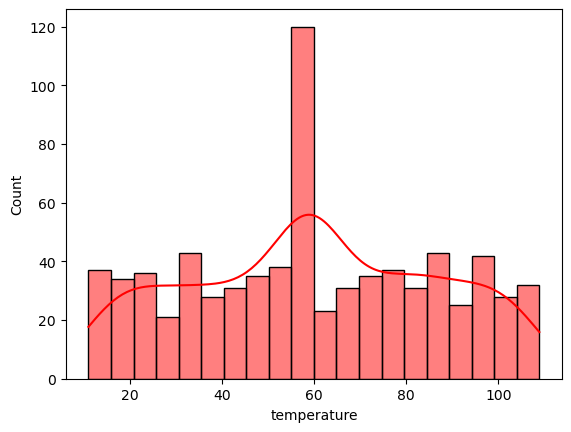

In [94]:
sns.histplot(df['temperature'], bins=20, kde=True, color='red', edgecolor='black')

<Axes: xlabel='humidity', ylabel='Count'>

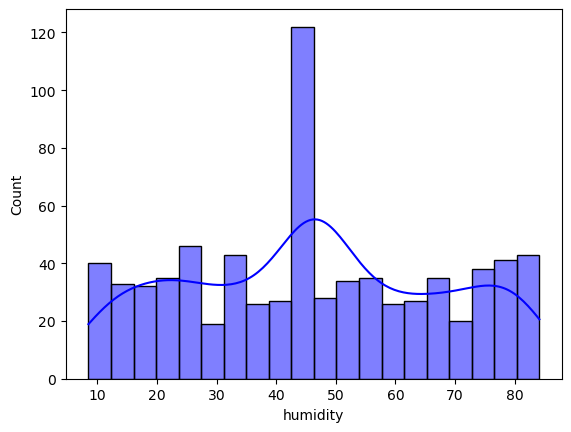

In [96]:
sns.histplot(df['humidity'], bins=20, kde=True, color='blue', edgecolor='black')

<Axes: xlabel='windspeed', ylabel='Count'>

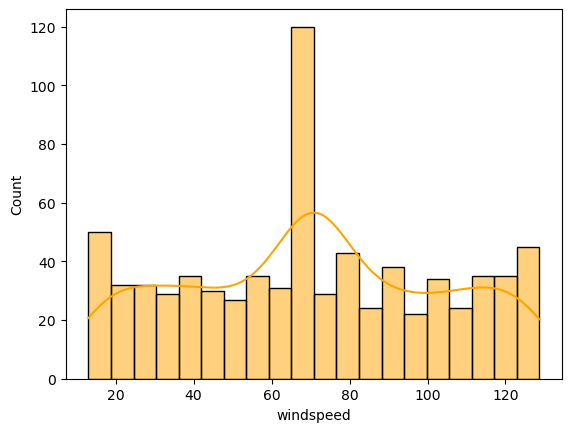

In [99]:
sns.histplot(df['windspeed'], bins=20, kde=True, color='orange', edgecolor='black')

Text(0, 0.5, 'Temperature ')

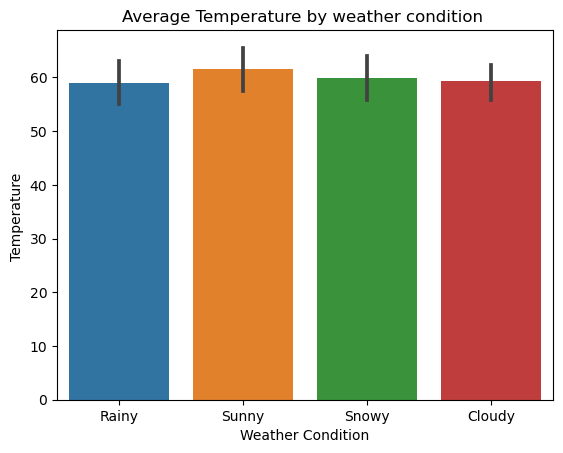

In [103]:
sns.barplot(data=df,x="weathercondition",y="temperature")
plt.title("Average Temperature by weather condition ")
plt.xlabel("Weather Condition")
plt.ylabel("Temperature ")

Text(0.5, 1.0, 'Temperature During rain or not')

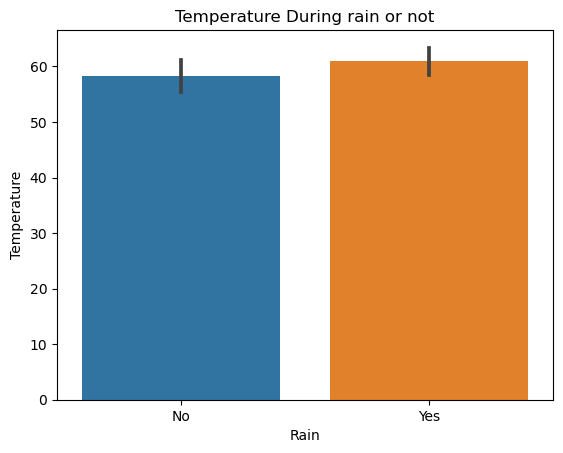

In [105]:
sns.barplot(data=df,x="rain",y="temperature")
plt.xlabel("Rain")
plt.ylabel("Temperature")
plt.title("Temperature During rain or not")

In [106]:
df.columns

Index(['date', 'day', 'temperature', 'humidity', 'rain', 'weathercondition',
       'windspeed', 'location'],
      dtype='object')

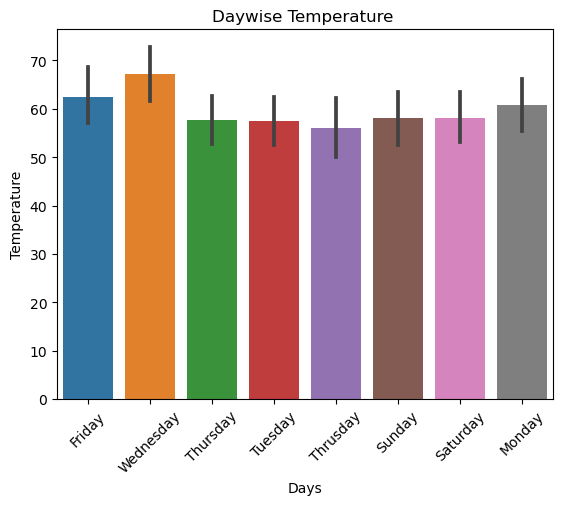

In [111]:
sns.barplot(data=df,x="day",y="temperature")
plt.xticks(rotation =45)
plt.title("Daywise Temperature ")
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.show()

In [114]:
df["rain"]=df["rain"].replace({"Yes":1,"No":0})


Text(0, 0.5, 'Temperature')

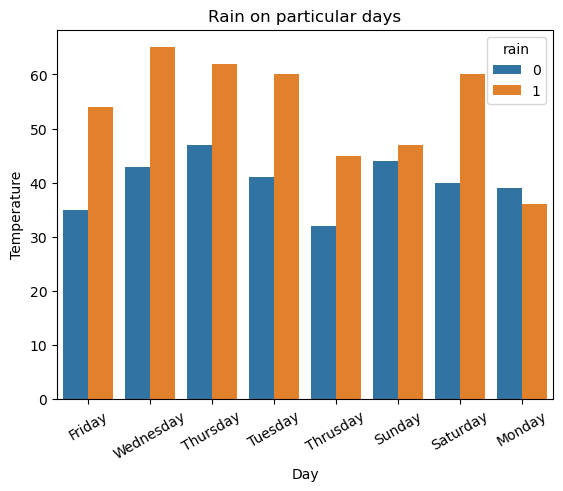

In [123]:
sns.countplot(data=df,hue="rain",x="day")
plt.xticks(rotation=30)
plt.title("Rain on particular days")
plt.xlabel("Day")
plt.ylabel("Temperature")

In [130]:
location =df["location"].value_counts().head(10)

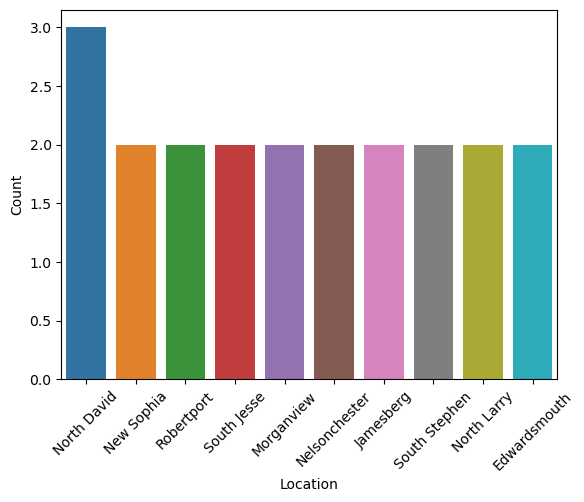

In [137]:
sns.barplot(x=location.index,y=location.values)
plt.ylabel("Count")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.show()

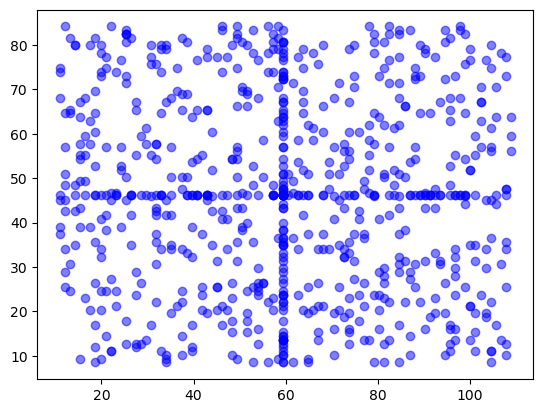

In [142]:
plt.scatter(df["temperature"],df["humidity"],color="blue",alpha=0.5)

In [144]:
rainyday=df[df["rain"]>0].groupby("day").size().reset_index(name="Count")

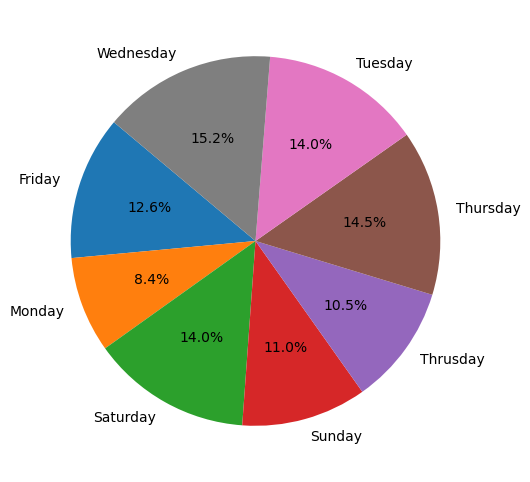

In [150]:
plt.figure(figsize=(8,6))
plt.pie(rainyday["Count"],
labels=rainyday["day"],
autopct="%1.1f%%",
startangle=140)
plt.show()